One of the most talked about items in probability, statistics, uncertainty and life is the simple coin toss.  Questions like

- If you toss a coin X number of times, what is the chance of getting Y number of heads (or tails)?

- If you toss a coin K number of times, what is the chance of getting M heads (or tails) in a row?

I think this code was inspired by having <a href=https://en.wikipedia.org/wiki/Fooled_by_Randomness>read too much</a> Nassim Taleb, and thinking of the idea of "If a fund manager beats the market partly by luck, what is the probability that he will be it x number of years in a row" or "If a supposedly skilled investor cannot handle a down year, how many years can he expect to beat the market before having a down year that ends his or her career?"

The first thing we'll do is a simple simulation to find the mean number of flips it takes to get a head, with different probabilities of flipping heads.  Next, we'll look at the distribution, because the mean value does not always help because it does not tell us about the distribution.

You could also think of it as a fund manager having a down year after a series of up years, or someone playing Russian Roulette with revolvers of varying capacity, how many times a man can speak to the girl he is courting without saying something stupid where she leaves him, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def num_flips_till_heads_single_run(probability, max_flips=1000):
    """
    Count how many coin flips until you get a "heads".
    :param probability: the probability of flipping a head on a given toss
    :param max_flips: the max number of times to try; currently not used
    :return:
    """
    flip = np.random.binomial(1, probability)
    num_flips = 1
    while flip == 0:
        flip = np.random.binomial(1, probability)
        num_flips += 1
    return num_flips


def num_flips_till_heads_n_runs(probability, num_trials):
    """
    Find how many flips it takes to get a heads...and do that many times.
    :param probability: the probability of flipping a head on a given toss
    :param num_trials: how many trials you will do
    :return: a numpy array showing how many times it took for each of the trials
    """
    results = []
    for n in np.arange(num_trials):
        results.append(num_flips_till_heads_single_run(probability))
    return np.array(results)



def dist_of_num_flips_till_head_given_prob(probability, num_trials):
    """
    Find the distribution of values from num_flips_till_heads_n_runs() for a given probability.
    num_flips_sim_for_diff_probs() tells the mean value, but sometimes the distribution is important also.
    :param probability:
    :param num_trials:
    :return: nothing
    """
    results = num_flips_till_heads_n_runs(probability, num_trials)
    g = sns.displot(results)
    g.set_axis_labels('num flips', 'count')
    plt.title(f'probability = {probability}')
    plt.show()

Note:  We are using np.random.binomial(1, probability) to do the coin flips.  To let the cat out of the bag, the term "coin flips" is just a metaphor...

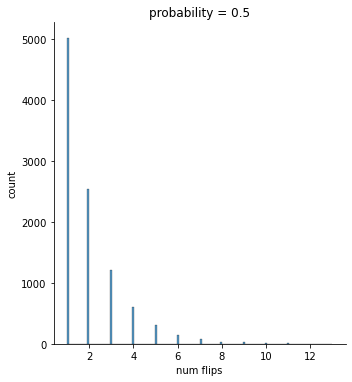

In [3]:
dist_of_num_flips_till_head_given_prob(.5, 10000)

The graph above tells us that, if we flip a fair coin (50/50 chance of heads or tails) 10000 times, it will come up heads after just one toss (that is, the first toos) about 5000 times, after two tosses about 2500 times, about 1200 times after three, and so forth.

Because we are using this to model yes/no decisions in real life, we want to look at cases where the probability is not 50/50.  So let's make functions to run the simulation many times for different probabilities.  We'll write one function that shows the distributions, and another that shows just the average (mean) values.

In [4]:

def num_flips_sim_for_diff_probs(num_breaks=100):
    """
    Do num_flips_till_heads_n_runs() for many different probabilities of getting a head, and track the mean number of
    flips for each probability.
    :return: nothing
    """
    results = []
    probabilities = np.linspace(.1, 1, num_breaks)
    for n in probabilities:
        result = num_flips_till_heads_n_runs(n, 100000).mean()
        if np.random.binomial(1, .1):
            print('probability: ', n, ';  mean # flips: ', result)
        results.append(result)
    fig = sns.lineplot(x=probabilities, y=results)
    fig.set_ylabel('count')
    fig.set_xlabel('num flips')
    plt.title('mean number of flips')
    plt.show()


def dists_for_diff_probs():
    """
    Run dist_of_num_flips_till_head_given_prob() for many different probabilities.  This will show the distribution
    of how many coin flips till heads, for many different probabilities of getting heads.
    :return: nothing
    """
    num_trials = 10000
    breaks = 10
    probabilities = np.linspace(.1, 1, breaks)
    for n in probabilities:
        dist_of_num_flips_till_head_given_prob(n, num_trials)

First, let's just get the mean values of how many flips it takes to get a heads as a function of probabilities.

probability:  0.1090909090909091 ;  mean # flips:  9.18192
probability:  0.33636363636363636 ;  mean # flips:  2.97534
probability:  0.3545454545454545 ;  mean # flips:  2.81909
probability:  0.6272727272727272 ;  mean # flips:  1.59646
probability:  0.6818181818181818 ;  mean # flips:  1.47301
probability:  0.7272727272727272 ;  mean # flips:  1.37892
probability:  0.9727272727272727 ;  mean # flips:  1.02847


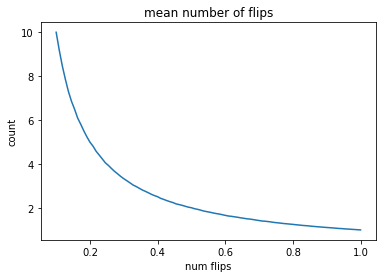

In [5]:
num_flips_sim_for_diff_probs()

Now let's look at some distributions.

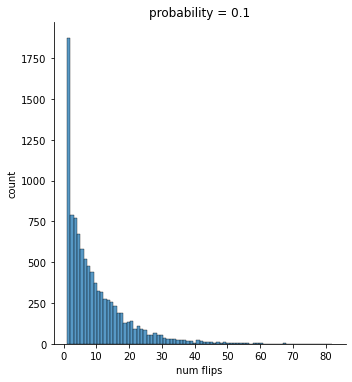

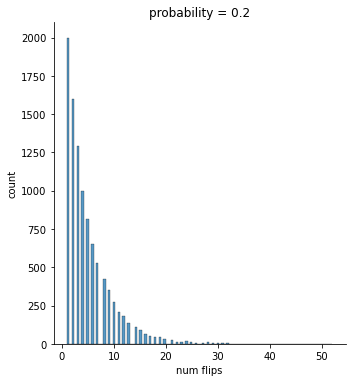

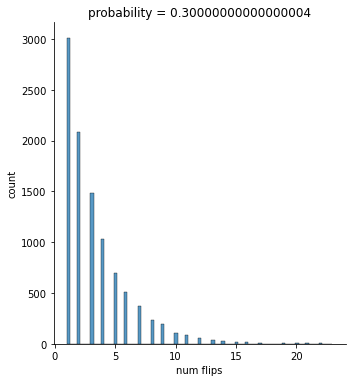

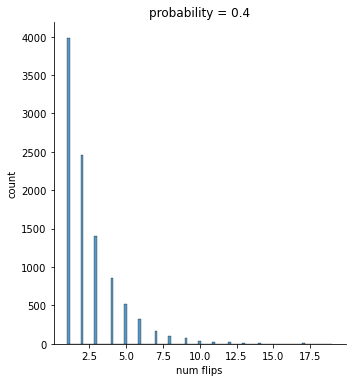

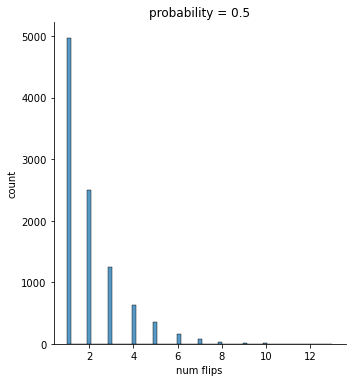

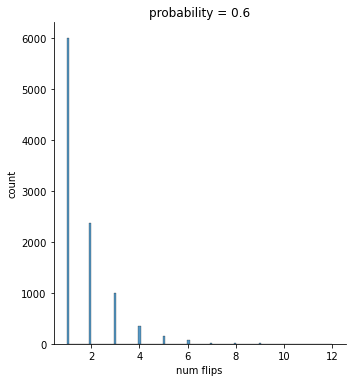

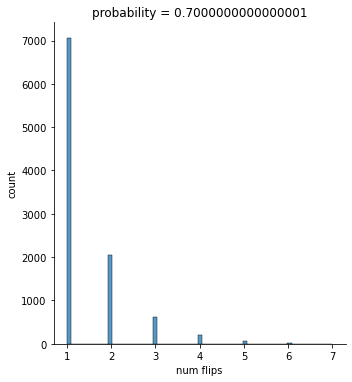

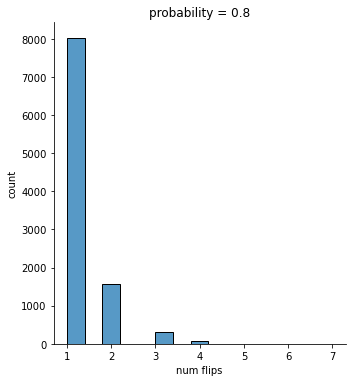

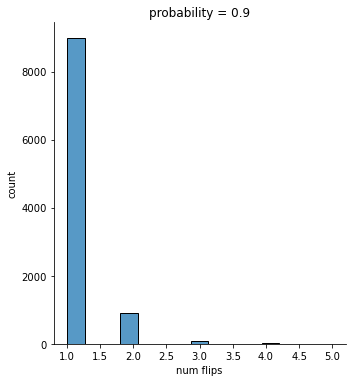

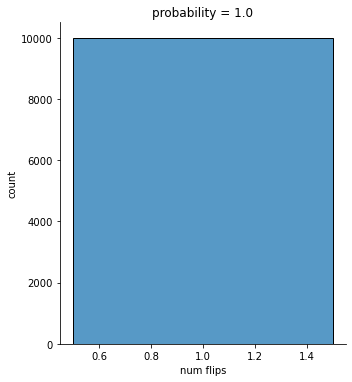

In [6]:
dists_for_diff_probs()